## Visualize and clusterize the data in the file x_12d.dat (N=600 samples, L=12 dimensions), which also has labels for checking the performances (y_12d.dat)

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from sklearn.cluster import DBSCAN
from sklearn.metrics import normalized_mutual_info_score

#### 1. “eps” (ε) and “minPts” (mP) in DBSCAN algorithm for clustering

Refine the grid with more values of ε and mP and plot a heat-map
showing the normalized mutual information (NMI) between true and
predicted clusters, similar to the one on the right.

Is the high NMI region showing a correlation between ε and mP?

The plots of ranked distances to the i-th neighbor might help choose
the ε for a given i=mP. How does the optimal value for ε given mP
relate to the ranked distances to the mP-th neighbor?

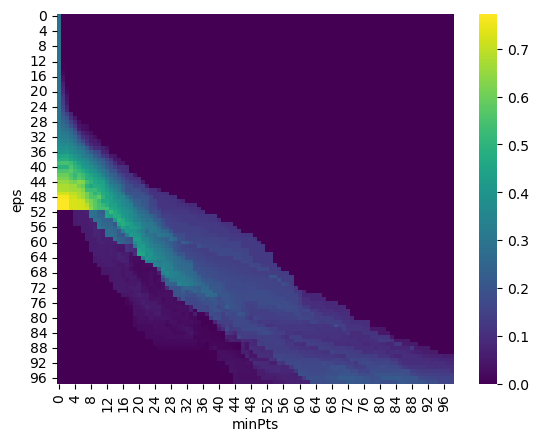

In [20]:
path = '/home/gabriele/ex3_lcpb/DATA/'
x = np.loadtxt(path + 'x_12d.dat')
label = np.loadtxt(path + 'y_12d.dat')

eps_values = np.arange(10,500,5)
minPts_values = np.arange(1,100)
nmi_values = []

for eps in eps_values:
    for minPts in minPts_values:
        db = DBSCAN(eps=eps, min_samples=minPts)
        pred = db.fit_predict(x)
        nmi = normalized_mutual_info_score(label, pred)
        nmi_values.append((eps, minPts, nmi))


nmi_matrix = np.array([[nmi for eps, mP, nmi in nmi_values if eps == eps_val]
                       for eps_val in eps_values])

sns.heatmap(nmi_matrix, xticklabels='auto', yticklabels='auto', cmap="viridis")
plt.xlabel('minPts')
plt.ylabel('eps')
plt.show()

2. Understanding the 12-dimensional data
Use the principal component analysis (PCA) to visualize the first components of the data.
Does it help understand its structure?

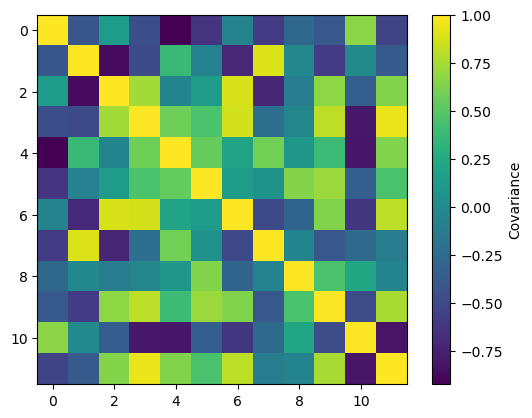

In [44]:
def standardize(data):
    data_mean = np.mean(data, axis=0)
    data_std = np.std(data, axis=0)
    standardized_data = (data - data_mean ) / data_std
    return standardized_data

standardized_data = standardize(x)

cov_matrix = np.cov(standardized_data.T)
plt.imshow(cov_matrix, cmap='viridis')
plt.colorbar(label='Covariance')
plt.show()